In [195]:
from __future__ import absolute_import,print_function,unicode_literals,division

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import json
import matplotlib.pyplot as plt
import collections
import re
import os
import unicodedata
from IPython.display import clear_output
from sklearn.model_selection import train_test_split

tf.__version__

'2.0.0-beta0'

In [196]:
data_path = 'WebOfScience/WOS11967/X.txt'
label_path = 'WebOfScience/WOS11967/YL1.txt'

In [197]:
def unicode_to_ascii(text):
    return ''.join(c for c in unicodedata.normalize('NFD',text) if unicodedata.category(c) != 'Mn')

def process_text(text):
    
    text = unicode_to_ascii(text.lower().strip())
    # create a space between a word and the punctuation following it
    text = re.sub(r"([?.!,¿])", r" \1 ", text)
    text = re.sub(r'[" "]+', " ", text)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text)
    text = text.strip()
    
    text = '<start> ' + text +  ' <end>'
    
    return text 

In [198]:
def load_data(path):
    text = []
    
    with open(path,encoding='utf-8') as f:
        for line in f:
            text_ = str(line.strip().split('\t'))
            text.append(process_text(text_))
    return text   

In [199]:
data = load_data(data_path)

print ('The size of data is:{}'.format(len(data)))

data[0]

The size of data is:11967


'<start> the aim of this study was to investigate a the behavioral cues that are displayed by , and trait judgments formed about , anxious interviewees , and b why anxious interviewees receive lower interview performance ratings . the behavioral expression of interview anxiety model was created as a conceptual framework to explore these relations . we videotaped and transcribed mock job interviews , obtained ratings of interview anxiety and interview performance , and trained raters to assess several verbal and nonverbal cues and trait judgments . the results indicated that few behavioral cues , but several traits were related to interviewee and interviewer ratings of interview anxiety . two factors emerged from our factor analysis on the trait judgments assertiveness and interpersonal warmth . mediation analyses were performed and indicated that assertiveness and interpersonal warmth mediated the relation between interview anxiety and interview performance . speech rate words spoken p

In [200]:
label = list()

with open(label_path,'r') as f:
    for line in f:
        label_ = line.strip().split('\n')
        label.append(label_)
    
print ('The size of label is:{}'.format(len(label)))

label[0]

The size of label is:11967


['2']

In [201]:
def tokenize(text):
    text_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    
    text_tokenizer.fit_on_texts(text)
    
    tensor = text_tokenizer.texts_to_sequences(text)
    
    return tensor,text_tokenizer

In [202]:
data_tensor, data_tokenizer = tokenize(data)
label_tensor, label_tokenizer = tokenize(label)

In [203]:
max_data_length = 300

data_tensor = keras.preprocessing.sequence.pad_sequences(data_tensor,maxlen = max_data_length,padding = 'post')
label_tensor = keras.preprocessing.sequence.pad_sequences(label_tensor,maxlen = 1,padding = 'post')


In [204]:
data_tensor

print (len(data_tensor))

11967


In [205]:
label_tensor

array([[2],
       [6],
       [4],
       ...,
       [1],
       [4],
       [6]])

In [206]:
def convert(text,tensor):
    for t in tensor:
        if t != 0:
            print ("%d ---> %s" % (t,text.index_word[t]))
            
convert(data_tokenizer,data_tensor[0])

18 ---> <start>
1 ---> the
367 ---> aim
4 ---> of
14 ---> this
26 ---> study
21 ---> was
7 ---> to
373 ---> investigate
8 ---> a
1 ---> the
685 ---> behavioral
1201 ---> cues
12 ---> that
17 ---> are
2382 ---> displayed
16 ---> by
3 ---> ,
5 ---> and
1258 ---> trait
1686 ---> judgments
1989 ---> formed
134 ---> about
3 ---> ,
4470 ---> anxious
12159 ---> interviewees
3 ---> ,
5 ---> and
103 ---> b
2398 ---> why
4470 ---> anxious
12159 ---> interviewees
2978 ---> receive
226 ---> lower
3326 ---> interview
83 ---> performance
1714 ---> ratings
2 ---> .
1 ---> the
685 ---> behavioral
214 ---> expression
4 ---> of
3326 ---> interview
425 ---> anxiety
43 ---> model
21 ---> was
1568 ---> created
15 ---> as
8 ---> a
2172 ---> conceptual
302 ---> framework
7 ---> to
986 ---> explore
33 ---> these
1664 ---> relations
2 ---> .
22 ---> we
9011 ---> videotaped
5 ---> and
7339 ---> transcribed
10053 ---> mock
4092 ---> job
2042 ---> interviews
3 ---> ,
203 ---> obtained
1714 ---> ratings
4 ---> of


In [219]:
data_tokenizer.index_word[1]

'the'

In [207]:
data_train, data_test, label_train, label_test = train_test_split(data_tensor, label_tensor,test_size = 0.2)

In [208]:
_label_train = []

for line in label_train:
    for value in line:
        _label_train.append(value)
        
_label_train = np.array(_label_train,dtype = np.int64)

label_train_one_hot= tf.one_hot(_label_train,6)
label_train_one_hot

<tf.Tensor: id=20350, shape=(9573, 6), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [209]:
one_hot= tf.one_hot(_label_train,6)
one_hot

<tf.Tensor: id=20356, shape=(9573, 6), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [210]:
batch_size = 16
buffer_size = 32

steps_per_epoch = len(data_train) // batch_size

vocab_data_size = len(data_tokenizer.word_index) + 1
vocab_label_size = len(label_tokenizer.word_index) + 1


dataset = tf.data.Dataset.from_tensor_slices((data_train,label_train)).shuffle(buffer_size)
dataset = dataset.batch(batch_size,drop_remainder=True)

dataset

<BatchDataset shapes: ((16, 300), (16, 1)), types: (tf.int32, tf.int32)>

In [211]:
embedding_dim = 32

model = keras.Sequential([
    keras.layers.Embedding(vocab_data_size,embedding_dim,input_length = max_data_length),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16,activation = 'relu'),
    keras.layers.Dense(6,activation = 'sigmoid')
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 300, 32)           1679712   
_________________________________________________________________
global_average_pooling1d_11  (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 102       
Total params: 1,680,342
Trainable params: 1,680,342
Non-trainable params: 0
_________________________________________________________________


In [212]:
model.compile(optimizer = keras.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(data_train,label_train_one_hot,epochs = 30,batch_size = 512,validation_split = 0.2)

Train on 7658 samples, validate on 1915 samples
Epoch 1/30
7658/7658 [==============================] - 1s 160us/sample - loss: 0.6795 - accuracy: 0.7732 - val_loss: 0.6643 - val_accuracy: 0.8185
Epoch 2/30
7658/7658 [==============================] - 1s 131us/sample - loss: 0.6469 - accuracy: 0.8597 - val_loss: 0.6250 - val_accuracy: 0.8696
Epoch 3/30
7658/7658 [==============================] - 1s 134us/sample - loss: 0.6009 - accuracy: 0.8706 - val_loss: 0.5720 - val_accuracy: 0.8696
Epoch 4/30
7658/7658 [==============================] - 1s 131us/sample - loss: 0.5419 - accuracy: 0.8706 - val_loss: 0.5081 - val_accuracy: 0.8696
Epoch 5/30
7658/7658 [==============================] - 1s 128us/sample - loss: 0.4771 - accuracy: 0.8706 - val_loss: 0.4464 - val_accuracy: 0.8696
Epoch 6/30
7658/7658 [==============================] - 1s 131us/sample - loss: 0.4225 - accuracy: 0.8706 - val_loss: 0.4035 - val_accuracy: 0.8696
Epoch 7/30
7658/7658 [==============================] - 1s 131us

In [213]:
_label_test = []

for line in label_test:
    for value in line:
        _label_test.append(value)
        
_label_test = np.array(_label_test,dtype = np.int64)

label_test_one_hot= tf.one_hot(_label_test,6)

result = model.evaluate(data_test,label_test_one_hot)
result

2394/2394 [==============================] - 0s 188us/sample - loss: 0.3062 - accuracy: 0.8710


[0.3062440793068088, 0.8709968]

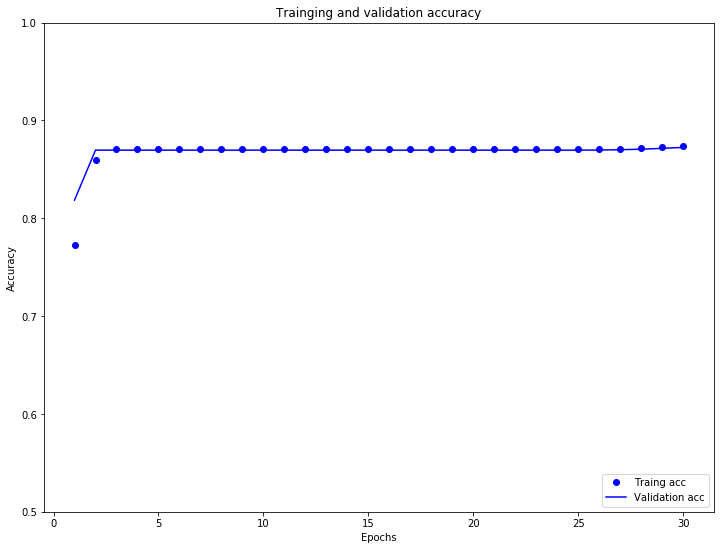

In [214]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label = 'Traing acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Trainging and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim((0.5,1))
plt.show()

In [215]:
# 词嵌入矩阵
e = model.layers[0]
weights = e.get_weights()[0]
weights.shape # (vocab_size, embedding_dim)

(52491, 32)

In [221]:
import io
# 获取vecs.tsv 和 meta.tsv
out_v = io.open('vecs.tsv','w',encoding = 'utf-8')
out_m = io.open('meta.tsv','w',encoding = 'utf-8')

for word_num in range(1,vocab_data_size):
    word = data_tokenizer.index_word[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()